# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('previsao_de_renda.csv',parse_dates=[0])
df.drop("Unnamed: 0",axis=1,inplace=True)
df

C:\Users\thomas.costa\AppData\Local\Temp\ipykernel_7008\4245133666.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('previsao_de_renda.csv',parse_dates=[0])


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


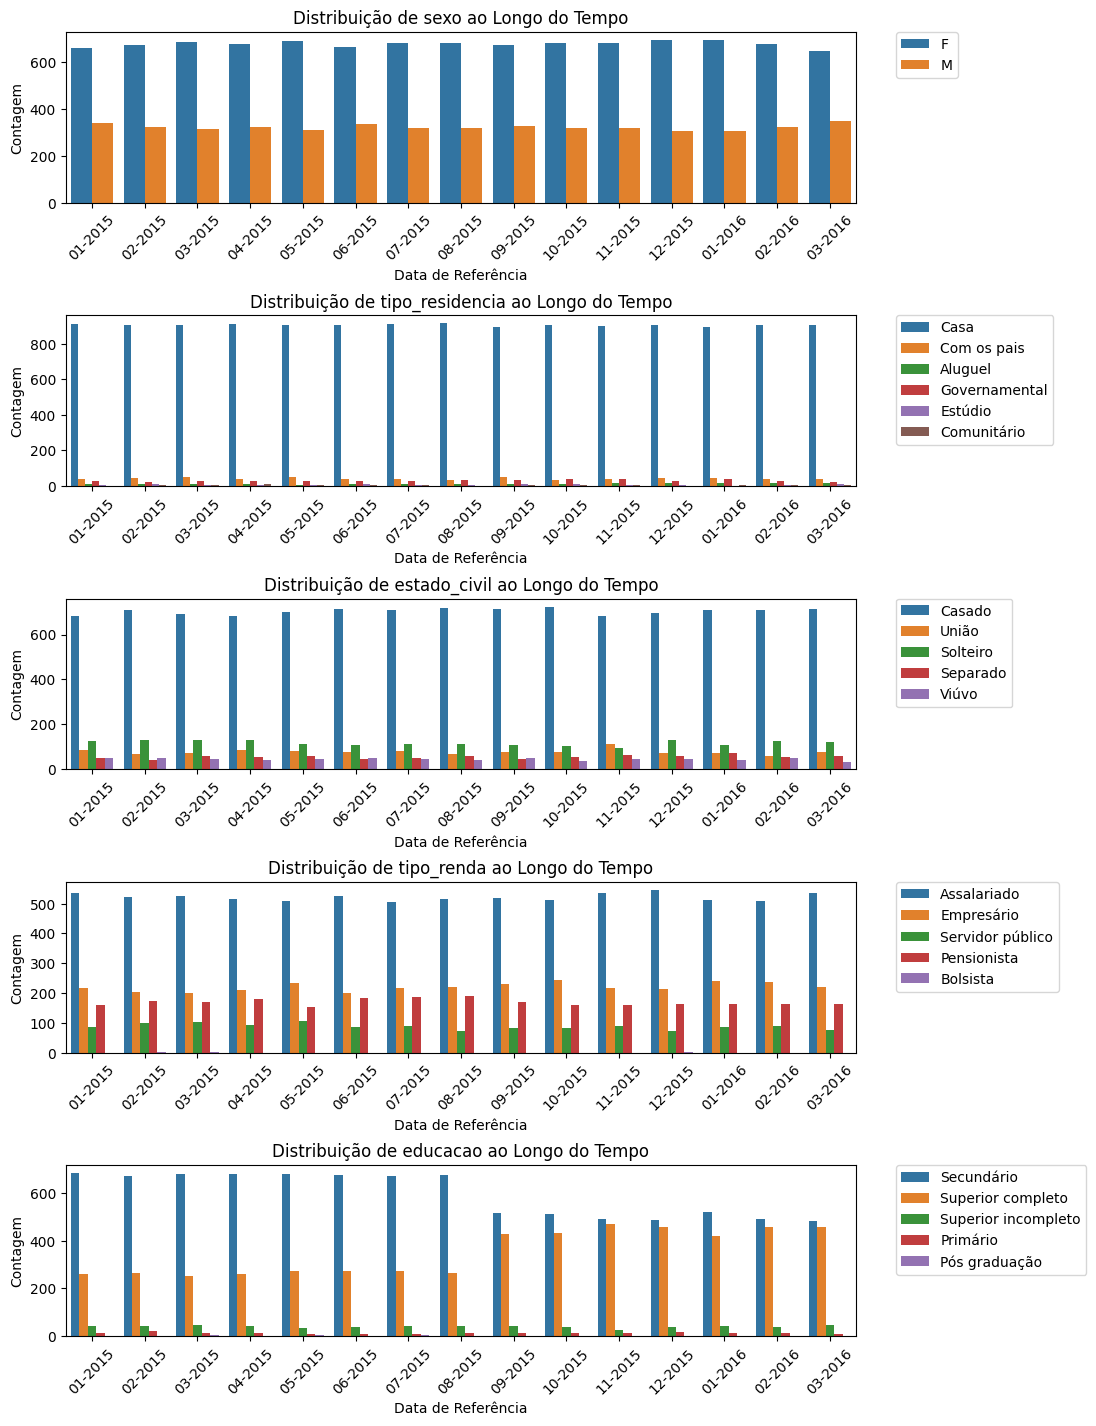

In [39]:
variaveis_qualitativas = ['sexo', 'tipo_residencia', 'estado_civil', 'tipo_renda','educacao']
#converte a coluna data_ref em datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Definir o número de linhas e colunas para o grid
num_linhas = len(variaveis_qualitativas)
num_colunas = 1  # Uma coluna para o tempo
# Criar a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 3 * num_linhas))
fig.tight_layout(pad=6.0)

for i, variavel in enumerate(variaveis_qualitativas):
    ax = sns.countplot(x='data_ref', hue=variavel,data=df, ax=axs[i])
    #retorna as data em tempo unicos para a geração do gráfico
    ticks_labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

    ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
    labels = ax.set_xticklabels(ticks_labels, rotation=45)

    # Adicionar legenda fora do gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xlabel('Data de Referência')
    ax.set_ylabel('Contagem')
    ax.set_title(f'Distribuição de {variavel} ao Longo do Tempo')
    # Adicionar legenda fora do gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

TypeError: Neither the `x` nor `y` variable appears to be numeric.

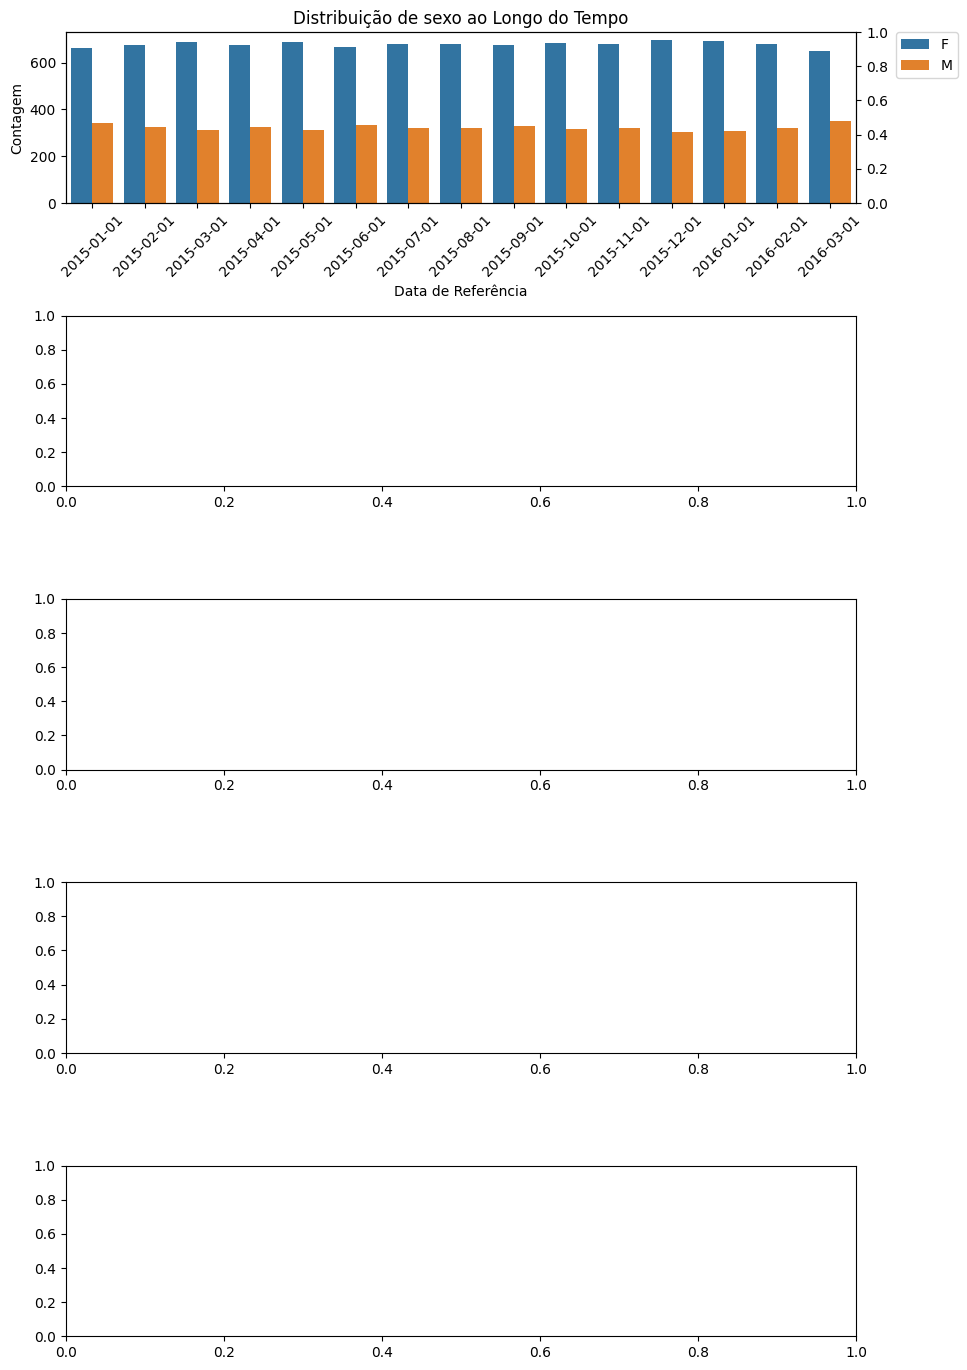

In [58]:
import matplotlib.dates as mdates

variaveis_qualitativas = ['sexo', 'tipo_residencia', 'estado_civil', 'tipo_renda','educacao']
#converte a coluna data_ref em datetime

# Definir o número de linhas e colunas para o grid
num_linhas = len(variaveis_qualitativas)
num_colunas = 1  # Uma coluna para o tempo
# Criar a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 3 * num_linhas))
fig.tight_layout(pad=6.0)

for i, variavel in enumerate(variaveis_qualitativas):
    ax = sns.countplot(x='data_ref', hue=variavel, data=df, ax=axs[i])
    #retorna as data em tempo unicos para a geração do gráfico
    ticks_labels = df['data_ref'].unique()

    ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
    labels = ax.set_xticklabels(ticks_labels, rotation=45)

    # Adicionar legenda fora do gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xlabel('Data de Referência')
    ax.set_ylabel('Contagem')
    ax.set_title(f'Distribuição de {variavel} ao Longo do Tempo')
    axb = ax.twinx()
    axb = sns.pointplot(x='data_ref', y=variavel, data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
    # Adicionar legenda fora do gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)